## Machine Learning

# 1.re-code the house price machine learning 

### 1.random choose method to get optimal k and b

In [38]:
from sklearn.datasets import load_boston

In [39]:
data = load_boston()##boston房价预测，很著名的数据集

In [40]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [41]:
data['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [42]:
X,y = data['data'],data['target']

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

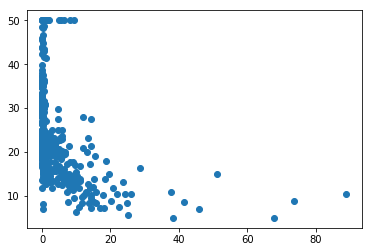

In [44]:
plt.scatter(X[:,0],y)##犯罪率越低房价越高

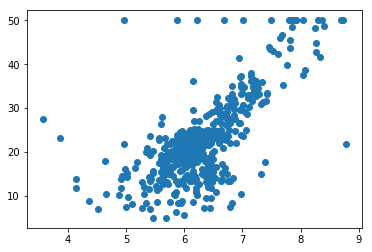

In [45]:
plt.scatter(X[:,5],y)

In [46]:
import random

In [47]:
def price(rm,k,b):
    """
     f(x)=k*x+b ##文档注释都是写在这边的
    """
    return k*rm+b

In [48]:
help(price)

Help on function price in module __main__:

price(rm, k, b)
    f(x)=k*x+b ##文档注释都是写在这边的



In [49]:
k=random.randint(-100,100)
b=random.randint(-100,100)
X_rm=X[:,5]
price_by_random_k_and_b=[price(r , k , b) for r in X_rm]

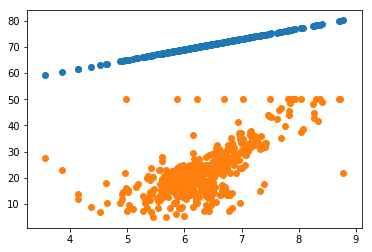

In [50]:
plt.scatter(X_rm,price_by_random_k_and_b)
plt.scatter(X[:,5],y)  ##随机的和真实情况差很远

评价哪个线拟合的更好，要用什么标准呢？

损失越大越不好，应用损失函数来判断拟合曲线的好坏

In [51]:
def loss(y,y_hat):
    return (sum((y_i - y_i_hat)**2 for y_i,y_i_hat in zip(list(y),list(y_hat))))/len(y)
    

In [52]:
loss(y,price_by_random_k_and_b)

2322.731800695654

$$ loss= \frac{1}{n} \sum({y_i-\hat{y}})^2$$

In [53]:
trying_times=10000
min_loss=float('inf')
best_k, best_b = None,None
for i in range(trying_times):
    k = random.randint(-100,100)
    b = random.randint(-100,100)
    price_by_random_k_and_b = [price(r,k,b) for r in X_rm]
    current_loss= loss(y,price_by_random_k_and_b)
    if current_loss < min_loss:
        min_loss= current_loss
        best_k, best_b =k,b
        print('The best k is: {},best b is: {} , and the loss is: {}'.format(best_k,best_b,min_loss))
        
    

The best k is: -77,best b is: -48 , and the loss is: 311110.6515748284
The best k is: -75,best b is: -10 , and the loss is: 257423.95774580038
The best k is: -60,best b is: 81 , and the loss is: 103909.15640553345
The best k is: -34,best b is: 2 , and the loss is: 55813.42567259292
The best k is: 25,best b is: 46 , and the loss is: 32778.364949357696
The best k is: 2,best b is: -70 , and the loss is: 6462.619412229247
The best k is: 7,best b is: 54 , and the loss is: 5739.934125895254
The best k is: 0,best b is: 80 , and the loss is: 3386.8979051383403
The best k is: 14,best b is: -33 , and the loss is: 1108.557161288537
The best k is: 12,best b is: -32 , and the loss is: 483.8296940079053
The best k is: -7,best b is: 63 , and the loss is: 183.77290613241104
The best k is: 16,best b is: -84 , and the loss is: 102.78776290909099
The best k is: 14,best b is: -71 , and the loss is: 86.19945377865605
The best k is: 13,best b is: -58 , and the loss is: 52.44926115217391
The best k is: 12,be

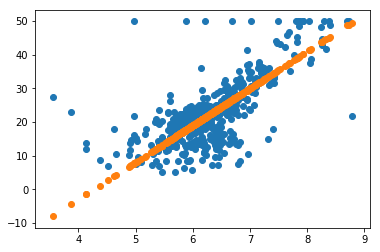

In [54]:
plt.scatter(X[:,5],y) 
plt.scatter(X_rm,price(X_rm,best_k,best_b))

### 2.Supervised Deriction to get optimal k and b

In [64]:
trying_times=10000
min_loss=float('inf')
best_k, best_b = None,None

current_k = random.random()*200-100
current_b = random.random()*200-100

direction = [
    (+1,-1),## first element: k's direction second element: b's direction
    (+1,+1),
    (-1,-1),
    (-1,+1),    
]

current_direction = random.choice(direction)
##如果沿着某个方向调整，loss变小了，则继续按照这个方向调整
for i in range(trying_times):
    k_direction,b_direction=current_direction
    current_k = current_k +k_direction
    current_b = current_b +b_direction
    price_by_random_k_and_b = [price(r,current_k,current_b) for r in X_rm]
    current_loss= loss(y,price_by_random_k_and_b)
    if current_loss < min_loss:
        min_loss= current_loss
        best_k, best_b =current_k,current_b
        print('The best k is: {},best b is: {} , and the loss is: {}'.format(best_k,best_b,min_loss))
    else:
        current_direction = random.choice(list(set(direction)-set(current_direction)))

The best k is: -9.576100231018756,best b is: -53.88228407938598 , and the loss is: 18874.333848947947
The best k is: -8.576100231018756,best b is: -52.88228407938598 , and the loss is: 16919.36318201108
The best k is: -7.576100231018756,best b is: -51.88228407938598 , and the loss is: 15071.509701821222
The best k is: -6.576100231018756,best b is: -50.88228407938598 , and the loss is: 13330.773408378416
The best k is: -5.576100231018756,best b is: -49.88228407938598 , and the loss is: 11697.154301682625
The best k is: -4.576100231018756,best b is: -48.88228407938598 , and the loss is: 10170.652381733855
The best k is: -3.5761002310187564,best b is: -47.88228407938598 , and the loss is: 8751.267648532157
The best k is: -2.5761002310187564,best b is: -46.88228407938598 , and the loss is: 7439.000102077493
The best k is: -1.5761002310187564,best b is: -45.88228407938598 , and the loss is: 6233.84974236985
The best k is: -0.5761002310187564,best b is: -44.88228407938598 , and the loss is: 

### 3.Gradient Descent to get optimal k and b

损失函数为:  $$ loss= \frac{1}{n} \sum({y_i-\hat{y_i}})^2$$ 

$$ loss=\frac{1}{n}\sum(y_i-(kx_i+b))^2$$

损失函数关于k和b的偏导数为：

$$ 
\frac{\partial loss}{\partial k}=\frac{2}{n}\sum(y_i-(kx_i+b))(-x_i)
\\
\frac{\partial loss}{\partial k}=\frac{2}{n}\sum(y_i-\hat{y_i})(-x_i)
\\
\frac{\partial loss}{\partial b}=\frac{2}{n}\sum(y_i-(kx_i+b))(-1)
\\
\frac{\partial loss}{\partial b}=\frac{2}{n}\sum(y_i-\hat{y_i})(-1)
$$

In [59]:
###定义loss function的函数
def loss(y,y_hat):
    return sum((y_i-y_hat_i)**2 for y_i,y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

In [60]:
###定义对k的导数
def partial_k(x,y,y_hat):
    n=len(y)
    gradient=0
    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient +=(y_i-y_hat_i)*(x_i)
    return -2/n*gradient
###定义对b的导数
def partial_b(y,y_hat):
    n=len(y)
    gradient=0
    for y_i,y_hat_i in zip(list(y),list(y_hat)):
        gradient +=(y_i-y_hat_i)*-1
    return -2/n*gradient

In [85]:
trying_times=10000
min_loss=1000000
best_k, best_b = None,None

current_k = random.random()*200-100
current_b = random.random()*200-100

scalar=0.1
update_time=0
learning_rate=0.01

for i in range(trying_times):
    price_by_k_and_b = [price(r,current_k,current_b) for r in X_rm]
        
    current_loss=loss(y,price_by_k_and_b)
    
    if current_loss<min_loss:
        
        min_loss=current_loss
    
        print("when time is {},get best k:{} get best b:{}, andt the loss is {}".format(i,current_k,current_b,min_loss))
    
    k_gradient=partial_k(X_rm,y,price_by_k_and_b)
    
    
    b_gradient=partial_b(y,price_by_k_and_b)
    
    
    current_k = current_k +(-1*k_gradient)*learning_rate
    
    
    current_b = current_b +(-1*b_gradient)*learning_rate
    
   
   

when time is 0,get best k:-97.50125588454071 get best b:-35.89006534665327, andt the loss is 456128.83131039946
when time is 1,get best k:-12.088049400128966 get best b:-49.31371769090793, andt the loss is 22114.252490919145
when time is 2,get best k:6.700083244200215 get best b:-52.27002758992945, andt the loss is 1115.4233189485774
when time is 3,get best k:10.833307727157436 get best b:-52.92393279711785, andt the loss is 99.44363375408207
when time is 4,get best k:11.743026203363101 get best b:-53.071400014125274, andt the loss is 50.289727847169964
when time is 5,get best k:11.943699681658464 get best b:-53.10747161510542, andt the loss is 47.91354037672314
when time is 6,get best k:11.98841115919383 get best b:-53.119041459258675, andt the loss is 47.80058990921009
when time is 7,get best k:11.998817245768548 get best b:-53.125222794510435, andt the loss is 47.797142154910844


### 4.Try different Loss function and learning rate

损失函数为： $$loss=\frac{1}{n} \sum{\vert{y_i-\hat{y_i}}\vert}$$

如果 $$y_i>\hat{y_i}$$

$$
loss=\frac{1}{n} \sum(y_i-\hat{y_i})
\\
loss=\frac{1}{n} \sum(y_i-kx_i-b)
$$

$$
\frac{\partial loss}{\partial k}=-\frac{1}{n}\sum{x_i}
\\
\frac{\partial loss}{\partial b}=-\frac{1}{n}
$$

否则 $$loss=\frac{1}{n} \sum(\hat{y_i}-y_i)\\loss=\frac{1}{n} \sum({kx_i+b-y_i})$$

$$
\frac{\partial loss}{\partial k}=\frac{1}{n}\sum{x_i}
\\
\frac{\partial loss}{\partial b}=\frac{1}{n}
$$

In [112]:
def loss_abs(y,y_hat):
    loss=0
    
    

SyntaxError: unexpected EOF while parsing (<ipython-input-112-848771c7a708>, line 1)

# 2.Answering the following questions

### 1.Why do we need machine learning methods instead of creating a complicated formula

ans:可以让计算机自己通过数据自发的学习规律，避免了人为的干扰。

### 2.What's the disadvantages of the 1st Random Choosen methods in our course?

ans:由于是随机选取k值和b值，无法保证下一个k值，b值能够持续的减少损失函数，在有限的尝试次数中无法得到最优的k和b

### 3. Is the 2nd method supervised direction better than 1st one? What's the disadvantages of the 2nd supversied directin method?

ans:有监督的方法比随机的更优，每一次k，b更新的间隔都是一样的，当loss function较为陡峭的时候，需要花费较长的时间来得到最优的k和b

### 4. Why do we use Derivative / Gredient to fit a target function?

ans:梯度下降法可以在对的方向上逼近最优的k和b，而且，逼近的速度相比较于第二种有监督的方法来的更快

### 5. In the words 'Gredient Descent', what's the Gredient and what's the Descent?

ans: gredient 是损失函数相对于各个参数的导数，descent是让参数沿着导数相反的方向改变，进而使损失函数减少的意思

### 6. What's the advantages of the 3rd gradient descent method compared to the previous methods?

ans:首先，其每一次更新k和b的方向都是对的，即每一次更新都能使损失函数减小。其次，其可以根据梯度的大小，调节更新的大小，当梯度较大的时候，他会对参数的值改变较大，以尽快逼近最优解。

### 7. Using the simple words to describe: What's the machine leanring.¶


ans：计算机根据数据，通过某种算法，学习其中的规律，并能对样本外的数据进行预测。

# 3.Finish the search problems

In [92]:
from bs4 import BeautifulSoup
import re
#soup=BeautifulSoup('<p>HELLO</p>','lxml')
#print(soup.p.string)
###测试beautifulsoup

In [93]:
import requests
url=requests.get("https://www.bjsubway.com/station/xltcx/",verify=False)
url.encoding='gbk'
url_text=url.text
print(url_text)


/Users/jv/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=gb2312" />
<title>站点及周边信息 | 北京地铁官方网站</title>
<meta name="keywords" content="北京地铁官方网站,地铁线路图,站内信息,站点首末车时间,公交换乘,服务设施,一卡通网点,站内立体示意图" />
<meta name="description" content="北京地铁线路查询，站点详细信息查询，能够更高效的获取地铁出行路线，得知指定站点的详细信息，使出行更加方便快捷。" />
<link rel="shortcut icon" href="/favicon.ico" type="image/x-icon" />
<link href="/subway/css/common.css" rel="stylesheet" type="text/css" />
<link href="/subway/css/search.css" rel="stylesheet" type="text/css" />
<script type="text/javascript" src="/subway/js/jquery.js"></script>
<script type="text/javascript" src="/subway/js/SubwayManager_min.js"></script>
</head>
<body>
<div class="wrap">
    <script>
var _hmt = _hmt || [];
(function() {
  var hm = document.createElement("script");
  hm.src = "https://hm.baidu.com/hm.js?01cf1cc88df5e

In [94]:
ls={}
old_line='aaa'
#pattern=r'</div>(.*?)<div\sclass="line_name">'
#pattern_line=re.compile(r'div\sclass="(subway_num.*?)">(.*?)</div>')
#pattern_sl=r'<div\sclass="subway.*?">{}</div>\n*</div>\n*(.*?)<div\sclass="line_name">'.format(str(line[0]))
pattern_station=re.compile(r'<div\sclass="station"><a\shref="/station/xltcx/(.*?)/.*?html">(.*?)</a></div>')
for line in url_text.split('\n'):
    if not re.findall(pattern_station,line):continue
    else:
        line,station=re.findall(pattern_station,line)[0][0],re.findall(pattern_station,line)[0][1]
        if old_line != line:
            old_line=line
            ls[line]=[]
            ls[line].append(station)
        else:
            ls[line].append(station)
            
for key in ls:
    print(key)
    print(ls[key])
        
    
   
    


line1
['苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '军事博物馆', '木樨地', '南礼士路', '复兴门', '西单', '天安门西', '天安门东', '王府井', '东单', '建国门', '永安里', '国贸', '大望路', '四惠', '四惠东']
line2
['西直门', '积水潭', '鼓楼大街', '安定门', '雍和宫', '东直门', '东四十条', '朝阳门', '建国门', '北京站', '崇文门', '前门', '和平门', '宣武门', '长椿街', '复兴门', '阜成门', '车公庄']
line5
['宋家庄', '刘家窑', '蒲黄榆', '天坛东门', '磁器口', '崇文门', '东单', '灯市口', '东四', '张自忠路', '北新桥', '雍和宫', '和平里北街', '和平西桥', '惠新西街南口', '惠新西街北口', '大屯路东', '北苑路北', '立水桥南', '立水桥', '天通苑南', '天通苑', '天通苑北']
line6
['金安桥', '苹果园', '杨庄', '西黄村', '廖公庄', '田村', '海淀五路居', '慈寿寺', '花园桥', '白石桥南', '车公庄西', '车公庄', '平安里', '北海北', '南锣鼓巷', '东四', '朝阳门', '东大桥', '呼家楼', '金台路', '十里堡', '青年路', '褡裢坡', '黄渠', '常营', '草房', '物资学院路', '通州北关', '北运河西', '北运河东', '郝家府', '东夏园', '潞城']
lines7
['北京西站', '湾子', '达官营', '广安门内', '菜市口', '虎坊桥', '珠市口', '桥湾', '磁器口', '广渠门内', '广渠门外', '九龙山', '大郊亭', '百子湾', '化工', '南楼梓庄', '欢乐谷景区', '垡头', '双合', '焦化厂']
line8
['朱辛庄', '育知路', '平西府', '回龙观东大街', '霍营', '育新', '西小口', '永泰庄', '林萃桥', '森林公园南门', '奥林匹克公园', '奥体中心', '北土城', '安华桥', '安德里北街', '

In [95]:
import requests

#使用高德API
def geocodeG(address):
    par = {'address': address, 'key': '389880a06e3f893ea46036f030c94700','city':"北京"}
    base = 'http://restapi.amap.com/v3/geocode/geo'
    response = requests.get(base, par)
    answer = response.json()
    GPS=answer['geocodes'][0]['location'].split(",")
    return float(GPS[0]),float(GPS[1])

In [96]:
geocodeG("北京八宝山")##测试一下是否可以获得经纬度

(116.236669, 39.907681)

In [97]:
station_coordinates={}
for line in ls:
    for station in ls[line]:
        try:
            station_coordinates[station]=geocodeG('北京'+station)
        except:
            pass

In [98]:
station_coordinates

{'苹果园': (116.179364, 39.926582),
 '古城': (116.188462, 39.911362),
 '八角游乐园': (116.208596, 39.912045),
 '八宝山': (116.236669, 39.907681),
 '玉泉路': (116.252419, 39.900692),
 '五棵松': (116.276703, 39.908738),
 '万寿路': (116.295846, 39.90131),
 '公主坟': (116.187855, 39.804608),
 '军事博物馆': (116.316876, 39.902067),
 '木樨地': (116.333916, 39.90846),
 '南礼士路': (116.352891, 39.922123),
 '复兴门': (116.35318, 39.906006),
 '西单': (116.374072, 39.907383),
 '天安门西': (116.391278, 39.907472),
 '天安门东': (116.401108, 39.907226),
 '王府井': (116.412422, 39.908966),
 '东单': (116.419375, 39.909821),
 '建国门': (116.435979, 39.908117),
 '永安里': (116.232361, 40.211305),
 '国贸': (116.407526, 39.90403),
 '大望路': (116.48057, 39.910341),
 '四惠': (116.49567, 39.91029),
 '四惠东': (116.507591, 39.930566),
 '西直门': (116.355423, 39.940475),
 '积水潭': (116.372779, 39.948033),
 '鼓楼大街': (116.267663, 40.18446),
 '安定门': (116.407129, 39.948913),
 '雍和宫': (116.417795, 39.945371),
 '东直门': (116.441822, 39.930855),
 '东四十条': (116.429276, 39.933874),
 '朝阳门': (116.4

In [99]:
from collections import defaultdict

In [100]:
#借鉴了许辉鹏同学的代码
station_connection_info = defaultdict(list)
station_line_map = defaultdict(list)
for line, stations in ls.items():
    for i in range(len(stations)):
        station_line_map[stations[i]].append(line)
        if stations[i] not in station_coordinates: continue
        if i > 0 and stations[i-1] in station_coordinates:
            station_connection_info[stations[i]].append(stations[i-1])
        if i < len(stations)-1 and stations[i+1] in station_coordinates:
            station_connection_info[stations[i]].append(stations[i+1])


In [101]:
station_connection_info#借鉴了许辉鹏同学的代码

defaultdict(list,
            {'苹果园': ['古城', '金安桥', '杨庄'],
             '古城': ['苹果园', '八角游乐园'],
             '八角游乐园': ['古城', '八宝山'],
             '八宝山': ['八角游乐园', '玉泉路'],
             '玉泉路': ['八宝山', '五棵松'],
             '五棵松': ['玉泉路', '万寿路'],
             '万寿路': ['五棵松', '公主坟'],
             '公主坟': ['万寿路', '军事博物馆', '莲花桥', '西钓鱼台'],
             '军事博物馆': ['公主坟', '木樨地', '北京西站', '白堆子'],
             '木樨地': ['军事博物馆', '南礼士路'],
             '南礼士路': ['木樨地', '复兴门'],
             '复兴门': ['南礼士路', '西单', '长椿街', '阜成门'],
             '西单': ['复兴门', '天安门西'],
             '天安门西': ['西单', '天安门东'],
             '天安门东': ['天安门西', '王府井'],
             '王府井': ['天安门东', '东单'],
             '东单': ['王府井', '建国门', '崇文门', '灯市口'],
             '建国门': ['东单', '永安里', '朝阳门', '北京站'],
             '永安里': ['建国门', '国贸'],
             '国贸': ['永安里', '大望路', '金台夕照', '双井'],
             '大望路': ['国贸', '四惠'],
             '四惠': ['大望路', '四惠东', '四惠东'],
             '四惠东': ['四惠', '四惠', '高碑店'],
             '西直门': ['积水潭', '大钟寺'],
       

In [102]:
station_line_map

defaultdict(list,
            {'苹果园': ['line1', 'line6'],
             '古城': ['line1'],
             '八角游乐园': ['line1'],
             '八宝山': ['line1'],
             '玉泉路': ['line1'],
             '五棵松': ['line1'],
             '万寿路': ['line1'],
             '公主坟': ['line1', 'line10'],
             '军事博物馆': ['line1', 'line9'],
             '木樨地': ['line1'],
             '南礼士路': ['line1'],
             '复兴门': ['line1', 'line2'],
             '西单': ['line1'],
             '天安门西': ['line1'],
             '天安门东': ['line1'],
             '王府井': ['line1'],
             '东单': ['line1', 'line5'],
             '建国门': ['line1', 'line2'],
             '永安里': ['line1'],
             '国贸': ['line1', 'line10'],
             '大望路': ['line1'],
             '四惠': ['line1', 'linebt'],
             '四惠东': ['line1', 'linebt'],
             '西直门': ['line2', 'line13'],
             '积水潭': ['line2'],
             '鼓楼大街': ['line2', 'line8'],
             '安定门': ['line2'],
             '雍和宫': ['line2', 'line5']

In [103]:
import math

In [104]:
def geo_distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [105]:
def get_geo_distance(station1, station2):
    return geo_distance(station_coordinates[station1], station_coordinates[station2])

In [106]:
get_geo_distance('篱笆房', '双井')

31.71020354817546

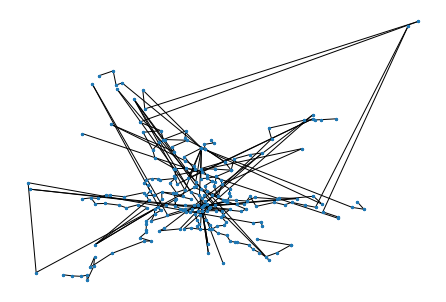

In [107]:
###画图出来坐标点有错误，定位到其他城市了，要重新改过，而且原始网页缺了两条铁路线
import networkx as nx
station_graph = nx.Graph()
station_graph.add_nodes_from(list(station_coordinates.keys()))
nx.draw(station_graph, station_coordinates, node_size=5)
station_with_road = nx.Graph(station_connection_info)
nx.draw(station_with_road, station_coordinates, node_size=5)

In [109]:
from collections import deque

In [110]:
def print_route(prev, start, destination):
    route = deque([destination])
    while prev[destination] != start:
        destination = prev[destination]
        route.appendleft(destination)
    route.appendleft(start)
    print('🚈'.join(route))

def search(start, destination, connection_graph):
    visited = {start}
    q = deque([start])
    prev = {}
    while q:
        station = q.popleft()
        for next_ in connection_graph[station]:
            if next_ in visited: continue
            prev[next_] = station
            if next_ == destination:
                print_route(prev, start, destination)
                return
            visited.add(next_)
            q.append(next_)
    print('无法到达！！！')


def search_bfs(start, destination, connection_graph):
    visited = set()
    routes = deque([[start]])
    while routes:
        cur = routes.pop()
        frontier = cur[-1]
        for next_ in connection_graph[frontier]:
            if next_ in visited or next_ in cur: continue
            new_route = cur + [next_]
            if next_ == destination: 
                print('🚈'.join(new_route))
                return 
            routes.appendleft(new_route)
        visited.add(frontier)
    print('无法到达！！！')
    

def search_dfs(start, destination, connection_graph):
    visited = set()
    routes = [[start]]
    while routes:
        cur = routes.pop()
        frontier = cur[-1]
        for next_ in connection_graph[frontier]:
            if next_ in visited or next_ in cur: continue
            new_route = cur + [next_]
            if next_ == destination: 
                print('🚈'.join(new_route))
                return 
            routes.append(new_route)
        visited.add(frontier)
    print('无法到达！！！')

In [111]:
search('王府井', '公主坟', station_connection_info)

王府井🚈天安门东🚈天安门西🚈西单🚈复兴门🚈南礼士路🚈木樨地🚈军事博物馆🚈公主坟
